# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Carregando dados

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dados_original = pd.read_excel(r'../bases/dados_gerais_usuarios_com_label.xlsx').drop(columns=['Unnamed: 0'])
dados_original.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não


In [4]:
dados = dados_original.copy()

# Tratando dataframe

## Escolhendo colunas

In [5]:
dados.columns

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa?',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que precisa/esperava ao pesquisar?',
       'Usaria o aplicativo?'],
      dtype='o

## Dados nulos e outliers

In [6]:
for i in dados:
    print(i)
    print(dados[i].unique())
    print()
    print("=" * 30)

Em qual faixa etária você se encaixa?
['Entre 46 e 59 anos' 'Entre 36 e 45 anos' 'Menos de 18 anos'
 'Entre 18 e 24 anos' 'Entre 25 e 35 anos' '60+ anos']

Qual a renda per capita da sua casa?
['Classe A: superior a R$ 22 mil' 'Classe B: entre R$ 7,1 mil e R$ 22 mil'
 'Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil']

Há quanto tempo você se interessa por arte?
['Há mais de 10 anos' 'Não me interesso' 'De 2 a 4 anos' 'De 5 a 9 anos'
 'Menos de 2 anos' 'Estou iniciando agora']

Qual das opções de arte abaixo você mais gosta?
['Arte digital' 'Fotografia' 'Arte de rua/grafite' 'Escultura' 'Pintura'
 'Arquitetura e Urbanismo' 'Não se interessa por arte']

Com que frequência você vai aos museus?
['Ocasionalmente (máximo três vezes ao ano)' 'Raramente (uma vez ao ano)'
 'Nunca' 'Frequentemente (máximo cinco vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)'
 'Não se interessa por arte']

Você já participou de algum curso ou atividade relacionada à arte

In [7]:
df = dados.copy()

## Transformando em numerico

In [8]:
df.fillna("#", inplace=True)
df.loc[df['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df:
    print(i)
    if df[i].dtype == object:
        dados_unique = df[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

        df[i] = df[i].map(mapeamento)

Em qual faixa etária você se encaixa?
Qual a renda per capita da sua casa?
Há quanto tempo você se interessa por arte?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?
Usaria o aplicativo?


In [9]:
df.head(10)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,4,0,4,2,4,0,2,3,0,0,1,0,5,1,0
1,3,1,4,2,5,0,0,0,0,1,1,0,5,1,0
2,5,3,0,4,2,0,0,3,0,5,0,0,5,1,0
3,1,0,1,1,4,0,2,3,0,0,2,1,5,1,0
4,4,1,2,2,5,2,0,4,2,5,0,0,5,1,0
5,3,3,5,1,0,2,0,3,2,1,2,2,3,2,1
6,1,3,0,2,0,0,0,3,0,3,1,0,5,1,0
7,4,2,4,3,5,0,0,3,0,1,2,2,3,2,1
8,5,2,5,6,1,2,0,4,0,2,2,1,5,1,1
9,4,0,2,4,0,0,0,0,2,1,1,0,5,1,1


# Modelo não supervisionado cru

In [10]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 5, random_state=0, n_init="auto")

modelo.fit(df)

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[4 4 0 4 4 4 0 2 3 0 4 4 3 4 0 4 2 1 4 4 0 3 0 4 0 3 4 4 1 0 0 1 1 0 1 4 1
 4 3 4 2 0 2 3 3 0 0 4 1 2 3 2 3 2 3 0 4 0 0 2 0 4 0 0 2 0 0 3 0 3 2 3 0 0
 4 0 4 3 4 0 2 2 4 2 2 0 0 1 1 0 0 2 1 3 0 3 0 3 0 3 3 0 2 0 4 1 2 2 1 3 3
 0 4 1 2 1 2 1 0 0 4 0 0 0 2 3 0 3 2 4 3 2 4 4 3 0 0 1 1 4 2 0 3 4 3 4 2 3
 2 0 4 0 3 1 2 0 3 0 0 4 3 1 0 4 3 3 0 4 3 3 2 0 3 3 3 4 0 0 3 2 1 3 3 0 0
 0 4 0 1 4 2 3 0 2 2 0 2 1 0 3 0 0 3 0 1 3 2 0 4 3 2 2 4 3 0 4 3 1 1 2 4 1
 1 2 3 1 0 1 2 0 0 4 4 0 1 1 4 3 0 1 4 0 1 1 2 2 1 1 4 1 0 4 3 3 3 0 3 0 1
 4 3 1 0 4 3 1 0 1 2 0 4 1 3 3 1 1 4 4 1 1 0 0 2 1 1 2 4 3]


In [11]:
dados['Cluster'] = labels

In [12]:
centers

array([[ 3.62962963e+00,  1.46913580e+00,  1.60493827e-01,
         4.87654321e+00,  2.77777778e+00,  9.25925926e-01,
         9.75308642e-01,  1.12345679e+00,  9.25925926e-01,
         3.88888889e+00,  8.64197531e-02, -4.44089210e-16,
         5.00000000e+00,  1.00000000e+00,  1.23456790e-02],
       [ 1.25000000e+00,  1.47916667e+00,  3.25000000e+00,
         4.83333333e+00,  3.45833333e+00,  1.00000000e+00,
         1.58333333e+00,  2.66666667e+00,  2.08333333e-01,
         1.89583333e+00,  1.70833333e+00,  1.25000000e+00,
         4.02083333e+00,  1.41666667e+00,  7.70833333e-01],
       [ 4.52272727e+00,  1.59090909e+00,  2.79545455e+00,
         3.31818182e+00,  4.59090909e+00,  1.04545455e+00,
         1.77272727e+00,  2.06818182e+00,  6.36363636e-01,
         2.00000000e+00,  1.93181818e+00,  1.68181818e+00,
         3.68181818e+00,  1.29545455e+00,  9.09090909e-01],
       [ 4.64406780e+00,  1.47457627e+00,  3.33898305e+00,
         5.62711864e+00,  3.91525424e+00,  1.11864407

## Visualizando as características de cada cluster

In [13]:
cluster_0 = dados.loc[dados['Cluster'] == 0]
cluster_1 = dados.loc[dados['Cluster'] == 1]
cluster_2 = dados.loc[dados['Cluster'] == 2]
cluster_3 = dados.loc[dados['Cluster'] == 3]
cluster_4 = dados.loc[dados['Cluster'] == 4]

### Analisando Cluster 0

In [14]:
cluster_0.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0
6,Entre 18 e 24 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Arte digital,Frequentemente (máximo cinco vezes ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0
9,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Sim,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Sim,0
14,Entre 18 e 24 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0
20,Entre 36 e 45 anos,Classe A: superior a R$ 22 mil,Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0


In [15]:
for i in cluster_0:
    print(cluster_0[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      41
Entre 18 e 24 anos    13
Entre 36 e 45 anos    10
Entre 46 e 59 anos     8
Entre 25 e 35 anos     7
60+ anos               2
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    31
Classe B: entre R$ 7,1 mil e R$ 22 mil     27
Classe A: superior a R$ 22 mil             13
Classes D/E: até R$ 2,9 mil                10
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso      73
De 2 a 4 anos          5
De 5 a 9 anos          2
Há mais de 10 anos     1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    71
Fotografia                    6
Arte digital                  2
Pintura                       2
Name: count, dtype: int64
Com que frequência você vai aos museus?
Não se interessa por arte                     71
Nunca                                          6
Frequentemente (máximo cinco 

### Analisando Cluster 1

In [16]:
cluster_1.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster
17,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Escultura,Nunca,Sim,Não,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,1
28,Entre 18 e 24 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,1
31,Entre 25 e 35 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Sim,1
32,60+ anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 5 a 9 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Blogs favoritos,Não,Sim,1
34,60+ anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Sim,1


In [17]:
for i in cluster_1:
    print(cluster_1[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    21
Entre 18 e 24 anos    15
60+ anos              11
Entre 36 e 45 anos     1
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    22
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classe A: superior a R$ 22 mil              9
Classes D/E: até R$ 2,9 mil                 5
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       22
De 5 a 9 anos            12
Menos de 2 anos           5
Estou iniciando agora     5
De 2 a 4 anos             4
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura       22
Fotografia    22
Escultura      4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Ocasionalmente (máximo três vezes ao ano)            17
Raramente (uma vez ao ano)                           16
Nunca                                                 7
Muito frequentemente (mais de cinco vezes ao a

### Analisano Cluster 2

In [18]:
cluster_2.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster
7,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Sim,2
16,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Nunca,Não,Sim,Com um guia do próprio museu.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim,2
40,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim,2
42,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,2
49,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Escultura,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,2


In [19]:
for i in cluster_2:
    print(cluster_2[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      31
Entre 46 e 59 anos     6
Entre 36 e 45 anos     6
Entre 25 e 35 anos     1
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe B: entre R$ 7,1 mil e R$ 22 mil     18
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    17
Classes D/E: até R$ 2,9 mil                 6
Classe A: superior a R$ 22 mil              3
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       13
De 2 a 4 anos            12
De 5 a 9 anos             8
Estou iniciando agora     6
Menos de 2 anos           5
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Fotografia             19
Escultura              11
Arte digital            8
Pintura                 3
Arte de rua/grafite     3
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                   30
Ocasionalmente (máximo três vezes ao ano)    12
Nunca                                  

### Analisando Cluster 3

In [20]:
cluster_3.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster
8,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Sim,3
12,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Livros,Não,Sim,3
21,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 5 a 9 anos,Pintura,Raramente (uma vez ao ano),Sim,Não,Com um guia do próprio museu.,Sim,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Redes sociais,Não,Sim,3
25,Entre 46 e 59 anos,"Classes D/E: até R$ 2,9 mil",De 5 a 9 anos,Pintura,Nunca,Sim,Sim,Com um guia do próprio museu.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim,3
38,Entre 36 e 45 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,3


In [21]:
for i in cluster_3:
    print(cluster_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      42
Entre 46 e 59 anos    13
Entre 36 e 45 anos     4
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    30
Classe B: entre R$ 7,1 mil e R$ 22 mil     18
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 3
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       29
De 5 a 9 anos            11
Estou iniciando agora    10
Menos de 2 anos           5
De 2 a 4 anos             4
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura       48
Fotografia    11
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           29
Ocasionalmente (máximo três vezes ao ano)            19
Muito frequentemente (mais de cinco vezes ao ano)     4
Frequentemente (máximo cinco vezes ao ano)            4
Nunca                           

### Analisando Cluster 4

In [22]:
cluster_4.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,4
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,4
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,4
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,4
5,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Sim,4


In [23]:
for i in cluster_4:
    print(cluster_4[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      20
Entre 25 e 35 anos    11
Entre 36 e 45 anos     8
Entre 46 e 59 anos     7
Entre 18 e 24 anos     7
60+ anos               3
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe B: entre R$ 7,1 mil e R$ 22 mil     19
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    15
Classe A: superior a R$ 22 mil             11
Classes D/E: até R$ 2,9 mil                11
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       19
De 2 a 4 anos            11
De 5 a 9 anos            10
Menos de 2 anos          10
Estou iniciando agora     6
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Arquitetura e Urbanismo    26
Arte digital               17
Arte de rua/grafite        12
Escultura                   1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           21
Ocasionalmente (máximo três vezes ao an

# Modelo não supervisionado com colunas relevantes

## Escolhendo e tratando colunas

In [24]:
dados_2 = dados_original.copy()
dados_2.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não


In [25]:
colunas = dados_2.columns
colunas

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa?',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que precisa/esperava ao pesquisar?',
       'Usaria o aplicativo?'],
      dtype='o

In [26]:
colunas_2 = ['Qual a renda per capita da sua casa?', 'Qual das opções de arte abaixo você mais gosta?', 'Com que frequência você vai aos museus?']
dados_2  = dados_2[colunas_2]
dados_2.head()

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,Classe A: superior a R$ 22 mil,Arte digital,Ocasionalmente (máximo três vezes ao ano)
1,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano)
2,"Classes D/E: até R$ 2,9 mil",Fotografia,Nunca
3,Classe A: superior a R$ 22 mil,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano)
4,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano)


In [27]:
for i in dados_2:
    print(dados_2[i].unique())

['Classe A: superior a R$ 22 mil' 'Classe B: entre R$ 7,1 mil e R$ 22 mil'
 'Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil']
['Arte digital' 'Fotografia' 'Arte de rua/grafite' 'Escultura' 'Pintura'
 'Arquitetura e Urbanismo' 'Não se interessa por arte']
['Ocasionalmente (máximo três vezes ao ano)' 'Raramente (uma vez ao ano)'
 'Nunca' 'Frequentemente (máximo cinco vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)'
 'Não se interessa por arte']


In [28]:
df_2 = dados_2.copy()
df_2 = df_2.fillna("#")

In [29]:
df_2

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,Classe A: superior a R$ 22 mil,Arte digital,Ocasionalmente (máximo três vezes ao ano)
1,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano)
2,"Classes D/E: até R$ 2,9 mil",Fotografia,Nunca
3,Classe A: superior a R$ 22 mil,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano)
4,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano)
...,...,...,...
283,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Pintura,Ocasionalmente (máximo três vezes ao ano)
284,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Pintura,Raramente (uma vez ao ano)
285,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Fotografia,Raramente (uma vez ao ano)
286,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano)


In [30]:
df_2.isna().sum()

Qual a renda per capita da sua casa?               0
Qual das opções de arte abaixo você mais gosta?    0
Com que frequência você vai aos museus?            0
dtype: int64

In [31]:
mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 20, 'Fotografia': 20, 'Escultura': 12, 'Arquitetura e Urbanismo': 6, 'Arte digital': 5,'Arte de rua/grafite': 4}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 20,'Muito frequentemente (mais de cinco vezes ao ano)': 15,'Ocasionalmente (máximo três vezes ao ano)': 12,'Raramente (uma vez ao ano)': 1,'Nunca': 1}
mapeamento_classe = {'Classes D/E: até R$ 2,9 mil': 3, 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 7,
'Classe B: entre R$ 7,1 mil e R$ 22 mil': 10, 'Classe A: superior a R$ 22 mil': 12}
mapeamento_2 = {'Qual a renda per capita da sua casa?': mapeamento_classe,'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia}

In [32]:
for k, v in mapeamento_2.items():
    print(k)
    df_2[k] = df_2[k].map(v)

Qual a renda per capita da sua casa?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?


In [33]:
df_2

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,12,5,12
1,10,5,1
2,3,20,1
3,12,4,12
4,10,5,1
...,...,...,...
283,7,20,12
284,7,20,1
285,10,20,1
286,10,5,1


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_2.columns
x = df_2.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])

df_2 = pd.concat([df_2, df_pca], axis=1)
df_2

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,PCA1,PCA2
0,12,5,12,0.774730,1.449939
1,10,5,1,-0.640096,0.938337
2,3,20,1,-0.466713,-2.139179
3,12,4,12,0.701301,1.495548
4,10,5,1,-0.640096,0.938337
...,...,...,...,...,...
283,7,20,12,1.213272,-0.943753
284,7,20,1,0.063604,-0.771532
285,10,20,1,0.461342,0.254204
286,10,5,1,-0.640096,0.938337


## Aplicando modelo

In [35]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=0, n_init="auto")

modelo.fit(df_2[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels_2 = modelo.labels_

print(labels_2)

[1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1]


In [36]:
dados_2['Cluster'] = labels_2

## Visualizando características dos clusters

In [37]:
cluster_0_2 = dados_2.loc[dados_2['Cluster'] == 0]
cluster_1_2 = dados_2.loc[dados_2['Cluster'] == 1]


### Cluster 0

In [38]:
cluster_0_2.head()

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
1,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano),0
2,"Classes D/E: até R$ 2,9 mil",Fotografia,Nunca,0
4,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano),0
7,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Raramente (uma vez ao ano),0
10,"Classes D/E: até R$ 2,9 mil",Arquitetura e Urbanismo,Nunca,0


In [39]:
for i in cluster_0_2:
    print(cluster_0_2[i].value_counts())
    print('=' * 30)

Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    46
Classe B: entre R$ 7,1 mil e R$ 22 mil     42
Classes D/E: até R$ 2,9 mil                30
Classe A: superior a R$ 22 mil             12
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    71
Arte digital                 20
Arquitetura e Urbanismo      18
Escultura                     7
Fotografia                    5
Arte de rua/grafite           5
Pintura                       4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Não se interessa por arte                    71
Raramente (uma vez ao ano)                   42
Nunca                                        14
Ocasionalmente (máximo três vezes ao ano)     3
Name: count, dtype: int64
Cluster
0    130
Name: count, dtype: int64


### Cluster 1

In [40]:
cluster_1_2.head()

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
0,Classe A: superior a R$ 22 mil,Arte digital,Ocasionalmente (máximo três vezes ao ano),1
3,Classe A: superior a R$ 22 mil,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),1
5,"Classes D/E: até R$ 2,9 mil",Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),1
6,"Classes D/E: até R$ 2,9 mil",Arte digital,Frequentemente (máximo cinco vezes ao ano),1
8,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Pintura,Muito frequentemente (mais de cinco vezes ao ano),1


In [41]:
for i in cluster_1_2:
    print(cluster_1_2[i].value_counts())
    print('=' * 30)

Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    69
Classe B: entre R$ 7,1 mil e R$ 22 mil     52
Classe A: superior a R$ 22 mil             32
Classes D/E: até R$ 2,9 mil                 5
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    71
Fotografia                 53
Arte de rua/grafite        10
Escultura                   9
Arquitetura e Urbanismo     8
Arte digital                7
Name: count, dtype: int64
Com que frequência você vai aos museus?
Ocasionalmente (máximo três vezes ao ano)            61
Raramente (uma vez ao ano)                           54
Frequentemente (máximo cinco vezes ao ano)           19
Muito frequentemente (mais de cinco vezes ao ano)    12
Nunca                                                12
Name: count, dtype: int64
Cluster
1    158
Name: count, dtype: int64


### Visualizando

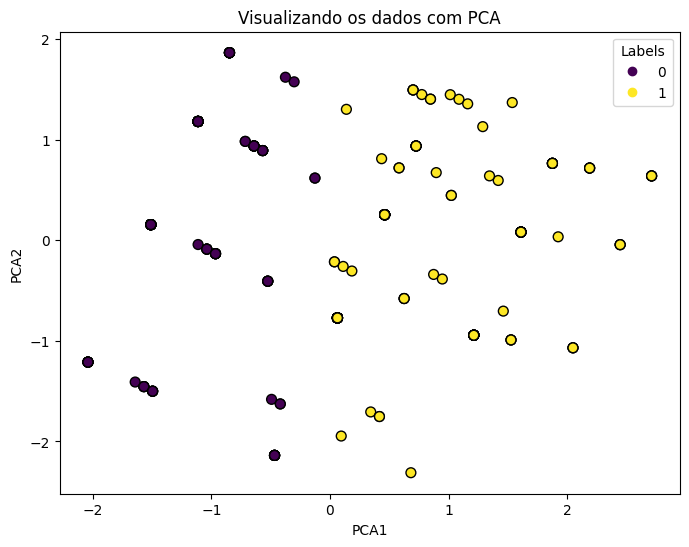

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_2['PCA1'], df_2['PCA2'], c=labels_2, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

### Criando a label e colunas

In [43]:
dados_2.head()

,Qual a renda per capita da sua casa?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
0,Classe A: superior a R$ 22 mil,Arte digital,Ocasionalmente (máximo três vezes ao ano),1
1,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano),0
2,"Classes D/E: até R$ 2,9 mil",Fotografia,Nunca,0
3,Classe A: superior a R$ 22 mil,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),1
4,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Raramente (uma vez ao ano),0


In [44]:
dados_original.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não


In [45]:
dados_original['Cluster'] = labels_2

In [46]:
mapeamento_usa_app = {0: 'Não', 1: 'Sim'}
dados_original['Assinaria o plano premium?'] = dados_original['Cluster'].map(mapeamento_usa_app)
dados_original.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster,Assinaria o plano premium?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,1,Sim
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,1,Sim
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não


# Modelo não supervisionado com PCA

In [47]:
dados_3 = dados_original.copy()

In [48]:
df_3 = dados_3.copy()
df_3.fillna("#", inplace=True)
for k, v in mapeamento_2.items():
    df_3[k] = df_3[k].map(v)
display(df_3)
df_3.loc[df_3['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df_3:
    if df_3[i].dtype == object:
        print(i)
        dados_unique = df_3[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

        df_3[i] = df_3[i].map(mapeamento)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster,Assinaria o plano premium?
0,Entre 46 e 59 anos,12,Há mais de 10 anos,5,12,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,1,Sim
1,Entre 36 e 45 anos,10,Há mais de 10 anos,5,1,Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
2,Menos de 18 anos,3,Não me interesso,20,1,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
3,Entre 18 e 24 anos,12,De 2 a 4 anos,4,12,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,1,Sim
4,Entre 46 e 59 anos,10,De 5 a 9 anos,5,1,Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,60+ anos,7,Há mais de 10 anos,20,12,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,1,Sim
284,Entre 25 e 35 anos,7,Estou iniciando agora,20,1,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,1,Sim
285,Menos de 18 anos,10,Estou iniciando agora,20,1,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim,1,Sim
286,Entre 36 e 45 anos,10,Menos de 2 anos,5,1,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Sim,0,Não


Em qual faixa etária você se encaixa?
Há quanto tempo você se interessa por arte?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?
Usaria o aplicativo?
Assinaria o plano premium?


In [49]:
df_3

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster,Assinaria o plano premium?
0,4,12,4,5,12,0,2,3,0,0,1,0,5,1,0,1,1
1,3,10,4,5,1,0,0,0,0,1,1,0,5,1,0,0,0
2,5,3,0,20,1,0,0,3,0,5,0,0,5,1,0,0,0
3,1,12,1,4,12,0,2,3,0,0,2,1,5,1,0,1,1
4,4,10,2,5,1,2,0,4,2,5,0,0,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0,7,4,20,12,0,0,3,0,2,1,0,5,1,0,1,1
284,2,7,3,20,1,0,0,3,0,1,1,0,5,1,0,1,1
285,5,10,3,20,1,0,2,3,0,2,2,2,3,0,1,1,1
286,3,10,5,5,1,0,0,3,0,3,2,1,5,1,1,0,0


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_3.columns
x = df_3.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [51]:
principal_components

array([[ 0.98383143,  2.17044497],
       [-1.84292593,  0.4774776 ],
       [-2.96578366,  0.33366724],
       [ 1.28134008,  1.61276993],
       [-3.14211846,  0.39736305],
       [ 2.71954392, -1.14459819],
       [-0.54402756,  2.11587675],
       [ 1.1261722 , -2.22969325],
       [ 2.50108775,  1.30722623],
       [ 0.62160114,  2.43974552],
       [ 1.04786777, -3.466748  ],
       [ 2.11692864,  1.47916937],
       [ 2.06296309,  1.15831238],
       [ 1.60763951,  0.06738222],
       [-3.59122551, -0.20773775],
       [ 1.71046248,  0.50538541],
       [-0.13528782, -2.33715528],
       [ 0.26174832,  2.45643788],
       [ 0.41964111,  2.19092475],
       [ 2.76816804,  0.38628332],
       [-3.58384277,  0.37179474],
       [ 0.22896702,  0.57641729],
       [-3.53345043,  0.42363403],
       [-1.50903174, -1.1751359 ],
       [-0.57967471,  2.8140843 ],
       [ 0.43694284, -2.47951071],
       [-1.64914929, -0.70105748],
       [ 2.75591914, -0.77940918],
       [ 2.78031334,

In [52]:
df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
df_3 = pd.concat([df_3, df_pca], axis=1)
df_3.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster,Assinaria o plano premium?,PCA1,PCA2
0,4,12,4,5,12,0,2,3,0,0,1,0,5,1,0,1,1,0.983831,2.170445
1,3,10,4,5,1,0,0,0,0,1,1,0,5,1,0,0,0,-1.842926,0.477478
2,5,3,0,20,1,0,0,3,0,5,0,0,5,1,0,0,0,-2.965784,0.333667
3,1,12,1,4,12,0,2,3,0,0,2,1,5,1,0,1,1,1.281340,1.612770
4,4,10,2,5,1,2,0,4,2,5,0,0,5,1,0,0,0,-3.142118,0.397363


In [53]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 4, random_state=0, n_init="auto")

modelo.fit(df_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[2 0 0 2 0 1 2 3 1 2 3 2 1 1 0 1 3 2 2 1 0 2 0 3 2 3 0 1 1 0 0 2 1 2 2 0 1
 2 2 1 3 0 2 1 2 0 0 2 1 3 2 3 2 3 1 0 0 2 0 1 0 3 0 0 1 0 0 1 0 1 1 1 0 2
 1 0 0 1 0 0 2 2 3 3 2 0 0 3 1 0 0 3 3 1 0 1 0 2 0 1 2 0 1 0 1 2 1 2 1 2 2
 0 0 3 3 1 2 3 0 0 3 0 0 0 3 2 0 1 2 2 2 1 3 2 2 2 0 1 1 1 3 0 1 3 2 3 1 2
 1 0 1 0 1 1 1 0 3 0 0 3 1 1 0 3 2 2 0 3 2 2 3 0 1 2 1 2 0 0 2 1 1 1 1 0 0
 0 2 0 2 3 1 1 0 3 3 0 1 3 0 2 0 0 1 0 1 2 3 0 3 1 0 3 3 2 0 3 2 1 1 2 1 1
 1 1 1 1 0 1 3 0 0 3 0 0 1 1 3 1 0 1 0 0 2 1 1 1 3 1 3 1 0 1 2 2 1 0 1 0 2
 3 1 2 0 3 1 2 2 1 1 0 1 1 1 2 1 1 1 1 2 1 0 0 1 2 2 1 3 2]


In [54]:
dados_3['Cluster'] = labels
dados_3.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?,Cluster,Assinaria o plano premium?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,2,Sim
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não,2,Sim
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não,0,Não


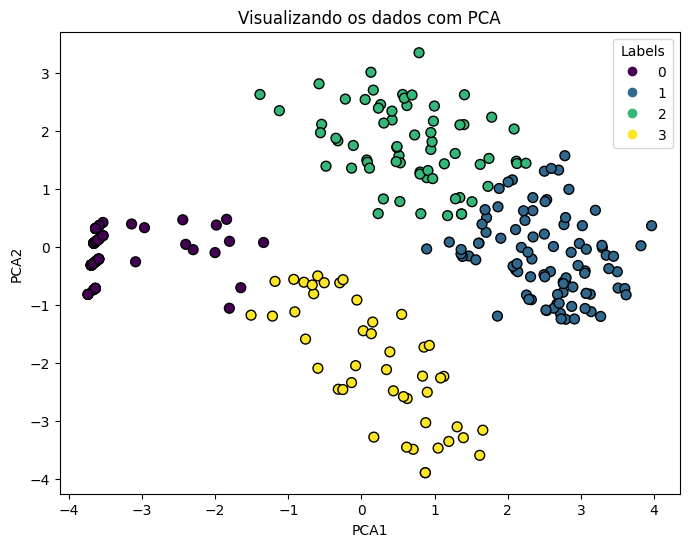

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_3['PCA1'], df_3['PCA2'], c=labels, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [56]:
cluster_0_3 = dados_3.loc[dados_3['Cluster'] == 0]
cluster_1_3 = dados_3.loc[dados_3['Cluster'] == 1]
cluster_2_3 = dados_3.loc[dados_3['Cluster'] == 2]
cluster_3_3 = dados_3.loc[dados_3['Cluster'] == 3]

### Cluster 0

In [57]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      45
Entre 18 e 24 anos    12
Entre 36 e 45 anos    10
Entre 25 e 35 anos     8
Entre 46 e 59 anos     7
60+ anos               2
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    34
Classe B: entre R$ 7,1 mil e R$ 22 mil     29
Classe A: superior a R$ 22 mil             11
Classes D/E: até R$ 2,9 mil                10
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso         72
Há mais de 10 anos        4
De 5 a 9 anos             3
De 2 a 4 anos             3
Estou iniciando agora     1
Menos de 2 anos           1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    71
Arte digital                  6
Arquitetura e Urbanismo       4
Fotografia                    1
Arte de rua/grafite           1
Escultura                     1
Name: count, dtype: int64
Com que frequência você vai aos mus

### Cluster 1

In [58]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      36
Entre 25 e 35 anos    19
Entre 36 e 45 anos    11
Entre 46 e 59 anos    11
Entre 18 e 24 anos     8
60+ anos               7
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    44
Classe B: entre R$ 7,1 mil e R$ 22 mil     32
Classe A: superior a R$ 22 mil             13
Classes D/E: até R$ 2,9 mil                 3
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       40
De 5 a 9 anos            17
Estou iniciando agora    16
De 2 a 4 anos            11
Menos de 2 anos           8
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    44
Fotografia                 29
Arte de rua/grafite         5
Escultura                   5
Arquitetura e Urbanismo     5
Arte digital                4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Ocasionalmente (máximo três vezes a

### Cluster 2

In [59]:
for i in cluster_2_3:
    print(cluster_2_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      32
Entre 46 e 59 anos    11
Entre 18 e 24 anos     8
Entre 25 e 35 anos     6
60+ anos               5
Entre 36 e 45 anos     4
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    25
Classe B: entre R$ 7,1 mil e R$ 22 mil     20
Classe A: superior a R$ 22 mil             19
Classes D/E: até R$ 2,9 mil                 2
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       24
De 5 a 9 anos            15
De 2 a 4 anos            14
Menos de 2 anos           6
Estou iniciando agora     6
Não me interesso          1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    27
Fotografia                 24
Arte de rua/grafite         5
Escultura                   4
Arte digital                3
Arquitetura e Urbanismo     3
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramen

### Cluster 3

In [60]:
for i in cluster_3_3:
    print(cluster_3_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      21
Entre 18 e 24 anos     7
Entre 25 e 35 anos     7
Entre 46 e 59 anos     5
Entre 36 e 45 anos     4
60+ anos               2
Name: count, dtype: int64
Qual a renda per capita da sua casa?
Classes D/E: até R$ 2,9 mil                20
Classe B: entre R$ 7,1 mil e R$ 22 mil     13
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    12
Classe A: superior a R$ 22 mil              1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       16
Menos de 2 anos          10
De 2 a 4 anos             8
De 5 a 9 anos             8
Estou iniciando agora     4
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Arquitetura e Urbanismo    14
Arte digital               14
Escultura                   6
Pintura                     4
Fotografia                  4
Arte de rua/grafite         4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)         